## Первоначальный импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import keras as kr
import sklearn as sl

## Загрузка и очистка датасета

In [2]:
df = pd.read_csv('master.csv')
df = df.drop(df.columns[[7, 8]], axis=1)
df.columns = ['country', 'year', 'sex', 'age', 'suicides', 'population',
              'suicides/100k', 'GPD', 'GPD/per', 'generation']
df['GPD'] = df['GPD'].str.replace(',', '').astype(float)
df['age'] = df['age'].str.replace(' years', '')
df

,country,year,sex,age,suicides,population,suicides/100k,GPD,GPD/per,generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107,3620833,2.96,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+,9,348465,2.58,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14,60,2762158,2.17,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14,44,2631600,1.67,6.306708e+10,2309,Generation Z


Описательная статистика данных

In [3]:
df.describe()

,year,suicides,population,suicides/100k,GPD,GPD/per
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


Информация и типах данных рассматриваемого датасета

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        27820 non-null  object 
 1   year           27820 non-null  int64  
 2   sex            27820 non-null  object 
 3   age            27820 non-null  object 
 4   suicides       27820 non-null  int64  
 5   population     27820 non-null  int64  
 6   suicides/100k  27820 non-null  float64
 7   GPD            27820 non-null  float64
 8   GPD/per        27820 non-null  int64  
 9   generation     27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


Разделение признаков

In [179]:
categorial_features = ['country', 'sex', 'age', 'generation']
real_features = ['year', 'population', 'GPD', 'GPD/per']
target_feature = 'suicides'

## Построение графиков отношений

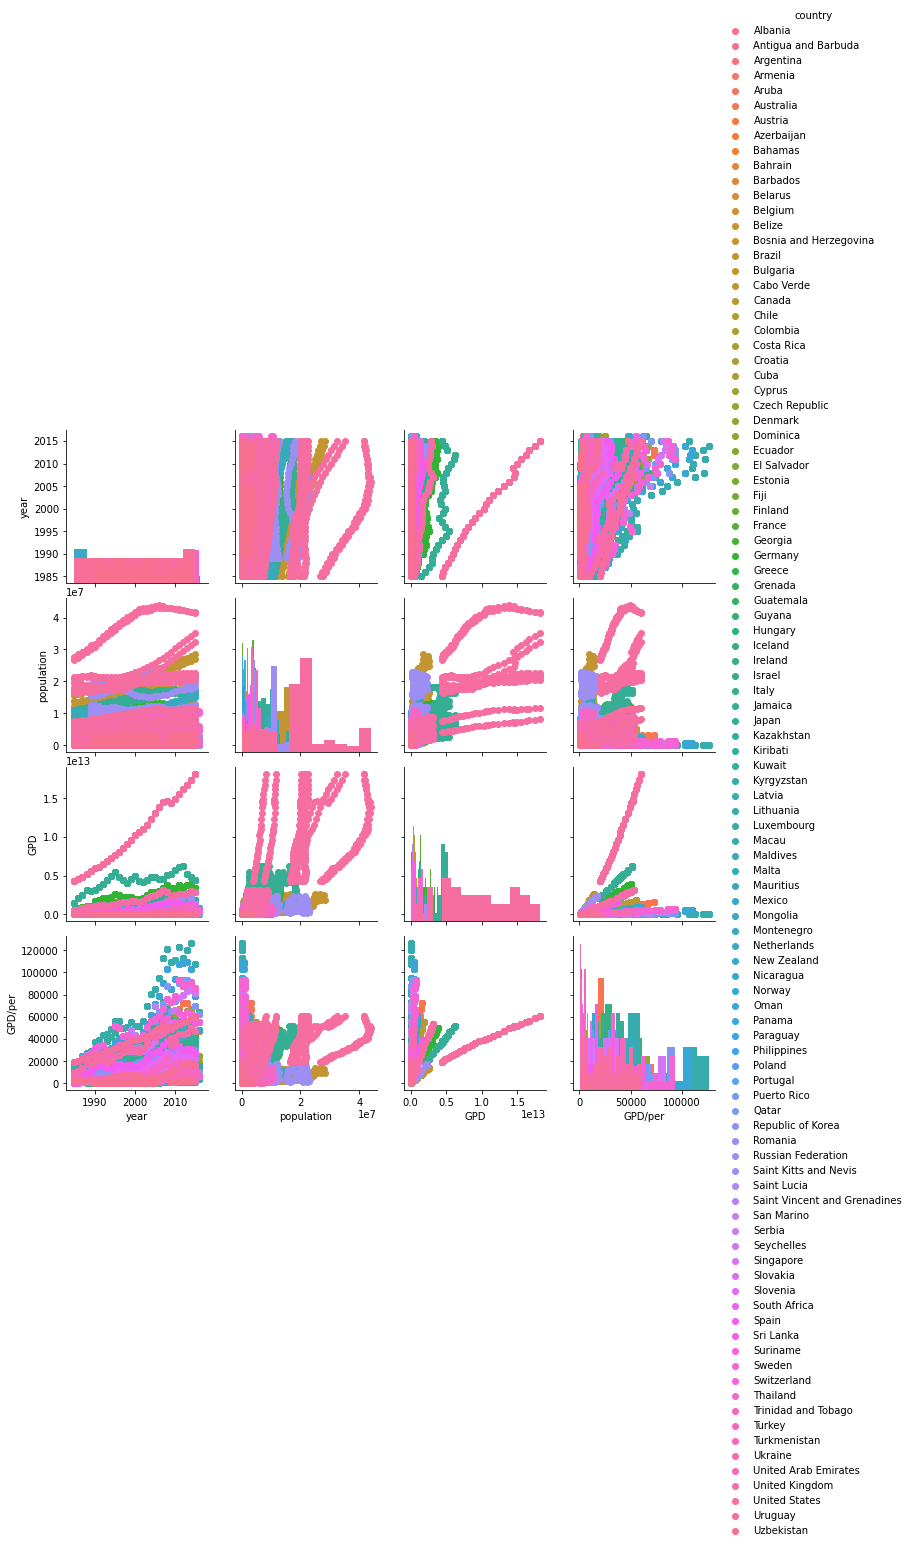

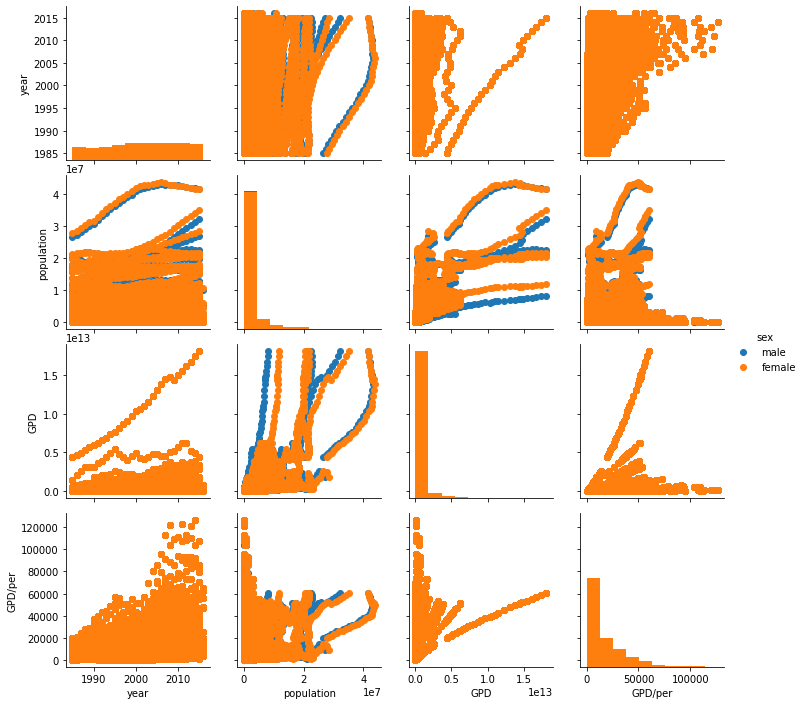

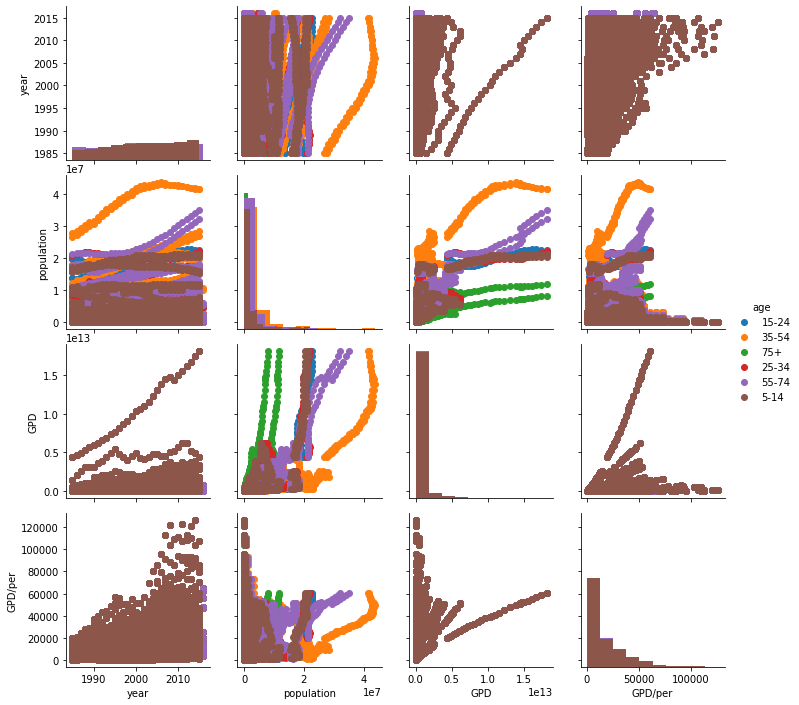

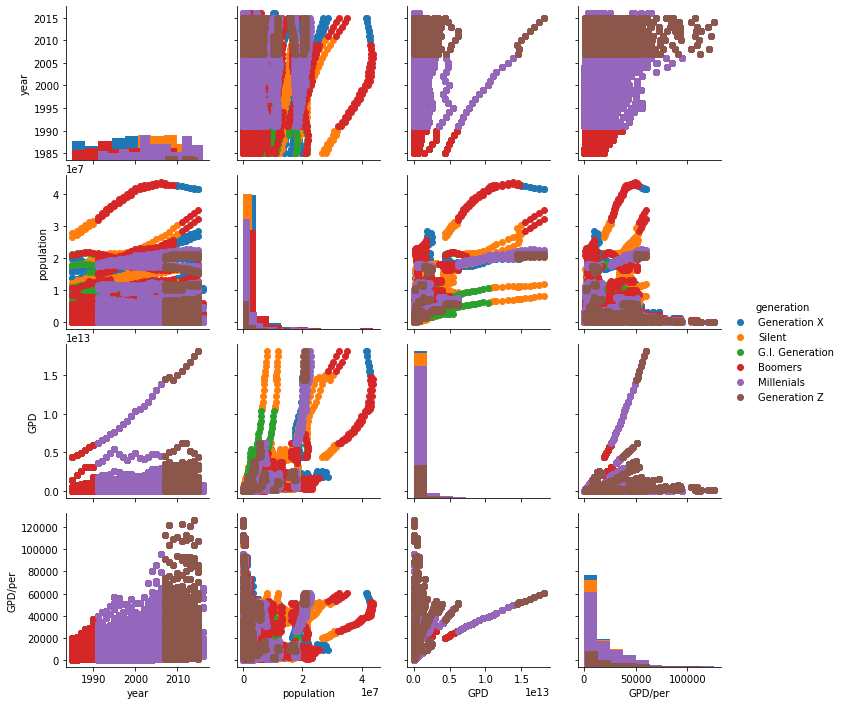

In [6]:
for i in categorial_features:
    g = sns.PairGrid(df[['year', 'population', 'GPD', 'GPD/per', i]], hue=i)
    g.map_diag(plt.hist)
    g.map_offdiag (plt.scatter)
    g.add_legend()

## Импорты инструментов и последующая кодировка признаков

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [64]:
X = df[['country', 'sex', 'age', 'generation', 'population', 'GPD', 'GPD/per']]
Y = df[target_feature]
enc = OneHotEncoder()
X = enc.fit_transform(X[['country', 'sex', 'age', 'generation']].values)
col = []
for i in enc.categories_:
    col.extend(i)
X = pd.DataFrame(X.toarray(), columns=col)
X['suicides'] = df['suicides']
X

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,5-14,55-74,75+,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,suicides
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,107
27816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9
27817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60
27818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44


Разделение датасета на тестовый и тренировочный наборы

In [74]:
X_train, X_test = train_test_split(X, test_size=0.1)
Y_train, Y_test = X_train['suicides'], X_test['suicides']
X_train, X_test = X_train.drop(columns='suicides'), X_test.drop(columns='suicides')
a = [X_train, X_test, Y_train, Y_test]
for i in a:
    print(i.shape)

(25038, 115)
(2782, 115)
(25038,)
(2782,)


## Импорты инструментов для построения регрессий

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Линейная регрессия

In [157]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

data = pd.DataFrame(Y_pred, Y_test).reset_index()
data.columns = ['suicides', "suicides_pred"]

print(mean_absolute_error(Y_pred, Y_test))
print(mean_squared_error(Y_pred, Y_test))
print(r2_score(Y_pred, Y_test))

248.18691588785046
439755.0021567218
-0.214213902264061


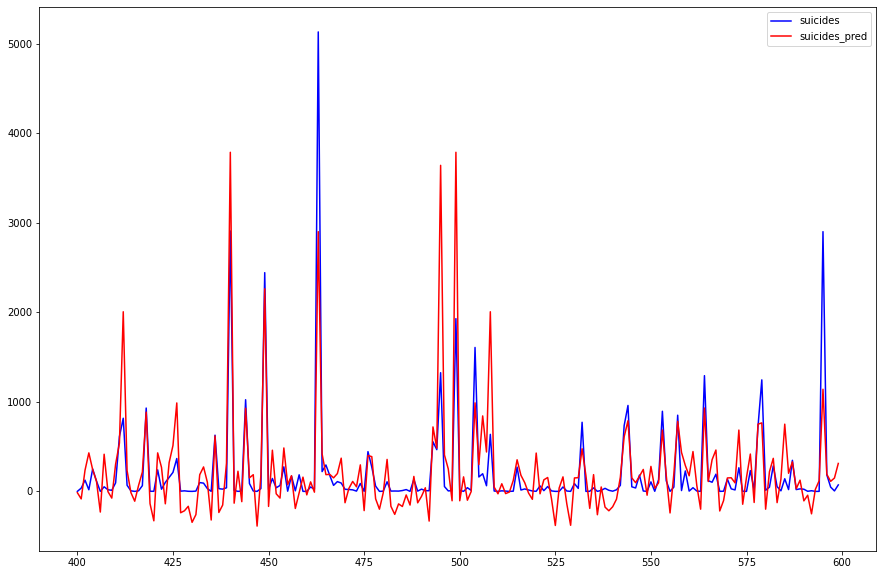

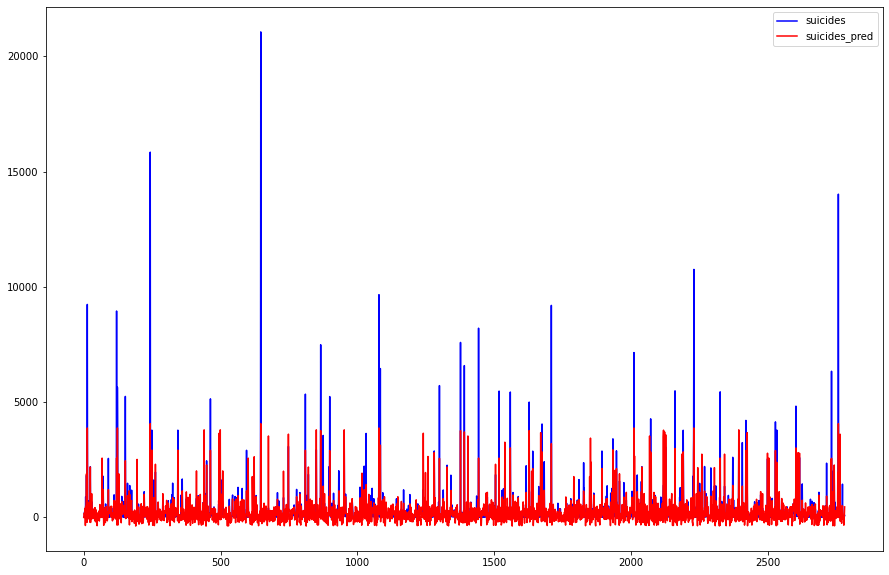

In [158]:
data[400:600].plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()
data.plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()

## Регрессия дерева

In [159]:
model = ExtraTreeRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

data = pd.DataFrame(Y_pred, Y_test).reset_index()
data.columns = ['suicides', "suicides_pred"]

print(mean_absolute_error(Y_pred, Y_test))
print(mean_squared_error(Y_pred, Y_test))
print(r2_score(Y_pred, Y_test))

36.07781407493951
32004.200691142854
0.966149210852966


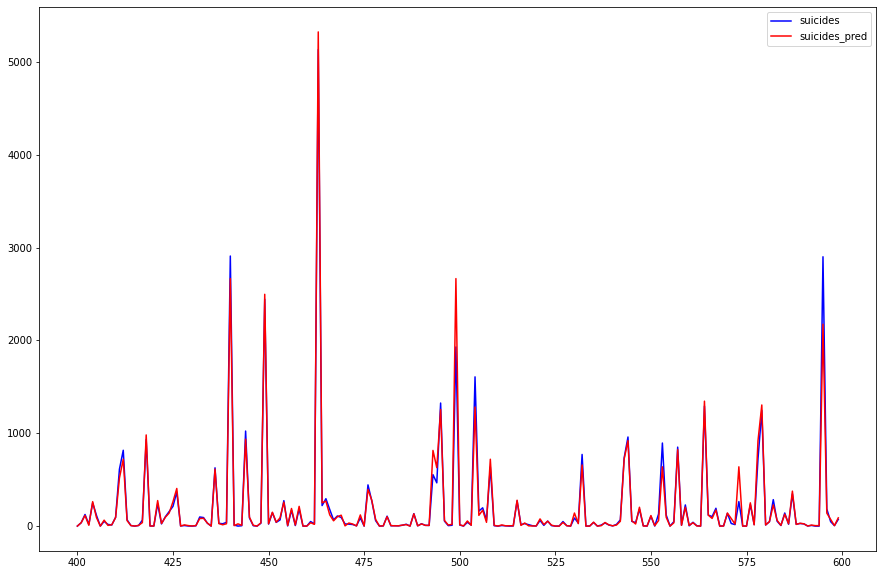

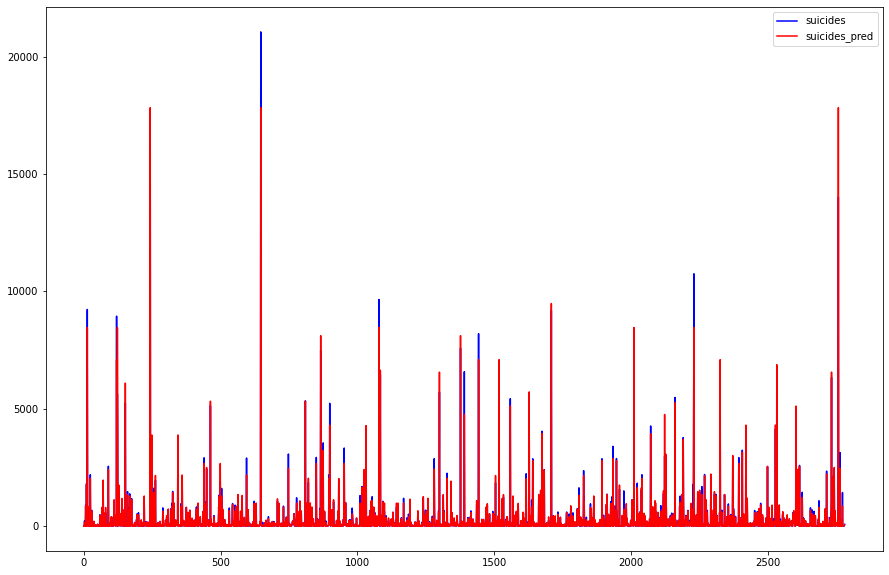

In [160]:
data[400:600].plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()
data.plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()

## Нейросетевая регрессия

In [165]:
model = MLPRegressor(max_iter=500)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

data = pd.DataFrame(Y_pred, Y_test).reset_index()
data.columns = ['suicides', "suicides_pred"]

print(mean_absolute_error(Y_pred, Y_test))
print(mean_squared_error(Y_pred, Y_test))
print(r2_score(Y_pred, Y_test))

54.01822045017306
48210.52826758629
0.9421850213227194


c:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


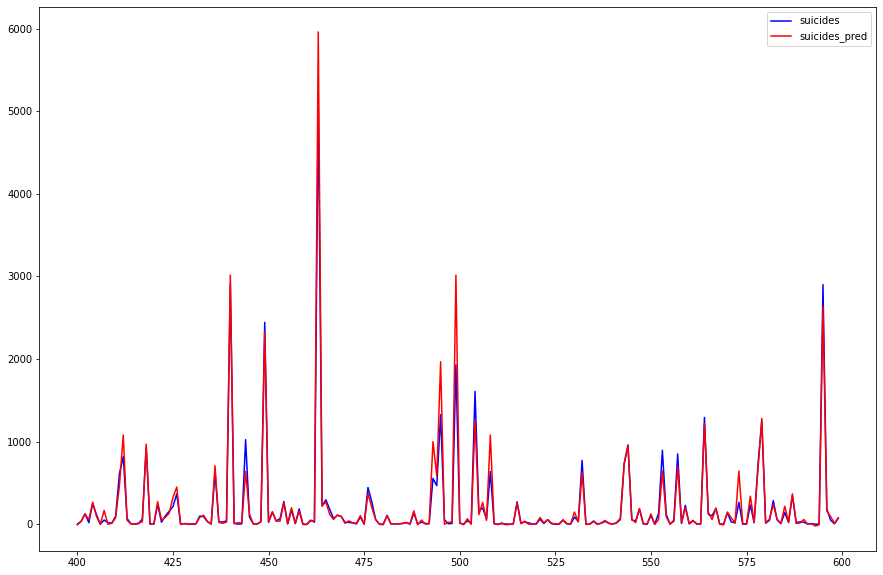

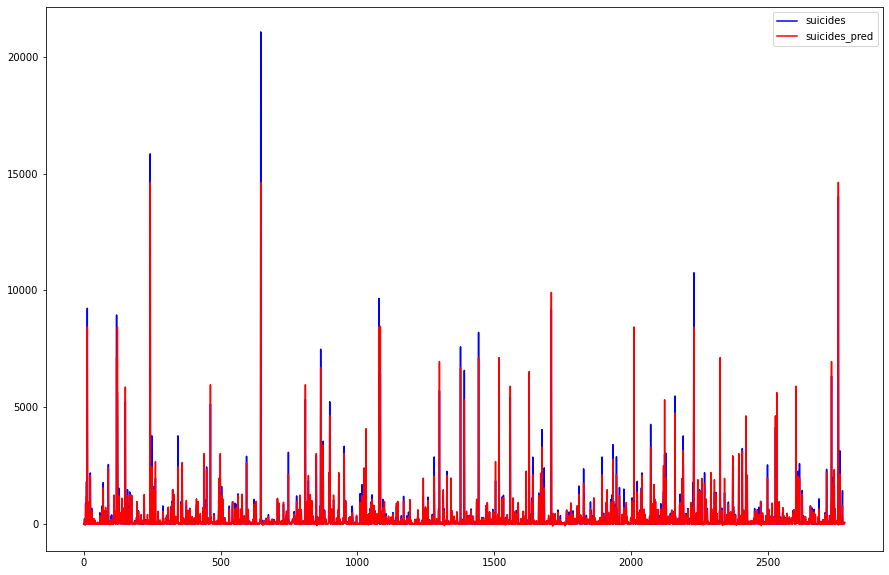

In [166]:
data[400:600].plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()
data.plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()

## Байесовская регрессия

In [177]:
model = BayesianRidge(n_iter=1000)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

data = pd.DataFrame(Y_pred, Y_test).reset_index()
data.columns = ['suicides', "suicides_pred"]

print(mean_absolute_error(Y_pred, Y_test))
print(mean_squared_error(Y_pred, Y_test))
print(r2_score(Y_pred, Y_test))

246.32676641959696
440519.18747360737
-0.23597976866270431


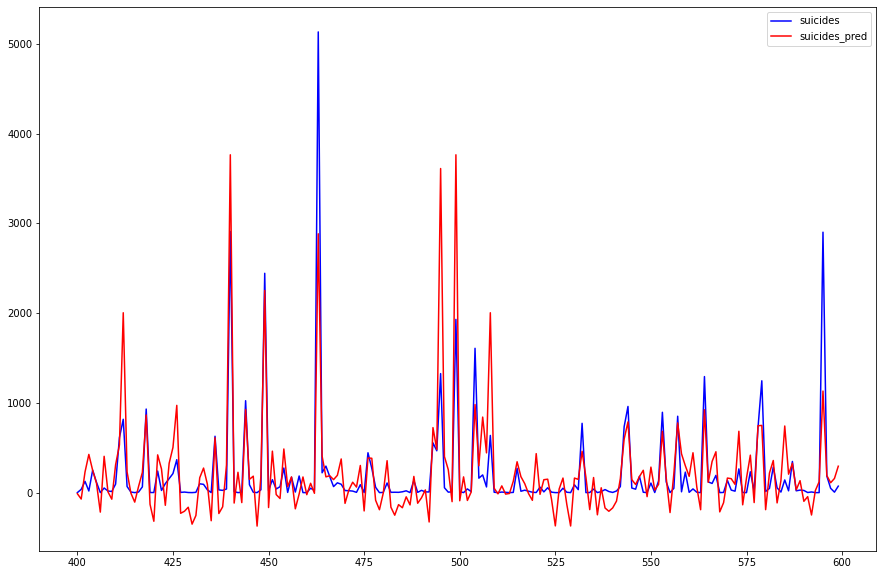

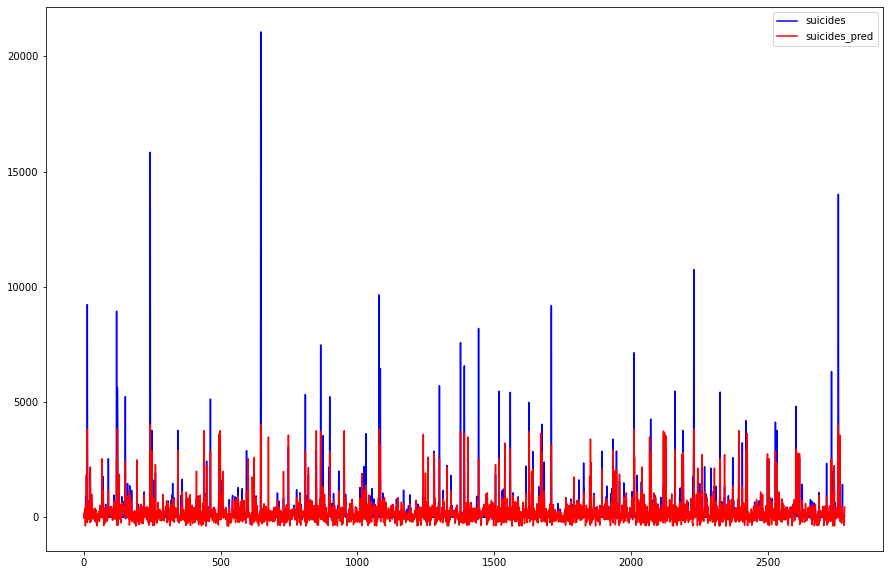

In [178]:
data[400:600].plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()
data.plot(color=['blue', 'red'], figsize=(15, 10))
plt.show()